In [1]:
import pandas as pd
import glob

In [2]:
fs = sorted(glob.glob('../2023.1/L2/RGI70C/b_040/L2/summary/glacier_statistics_*.csv'))
df = []
for f in fs:
    df.append(pd.read_csv(f, index_col=0, low_memory=False))
df = pd.concat(df)

In [4]:
fs = sorted(glob.glob('../2023.1/L2/RGI70C/b_040/L2/summary/millan_statistics_*.csv'))
dfm = []
for f in fs:
    dfm.append(pd.read_csv(f, index_col=0, low_memory=False))
dfm = pd.concat(dfm)

In [8]:
fs = sorted(glob.glob('../2023.1/L2/RGI70C/b_040/L2/summary/itslive_statistics_*.csv'))
dfi = []
for f in fs:
    dfi.append(pd.read_csv(f, index_col=0, low_memory=False))
dfi = pd.concat(dfi)

In [9]:
fs = sorted(glob.glob('../2023.1/L2/RGI70C/b_040/L2/summary/glathida_statistics_*.csv'))
dfg = []
for f in fs:
    dfg.append(pd.read_csv(f, index_col=0, low_memory=False))
dfg = pd.concat(dfg)

In [10]:
dfi

rgi_region rgi_subregion  rgi_area_km2  \
rgi_id                                                            
RGI2000-v7.0-C-01-00001           1         01-01      0.239199   
RGI2000-v7.0-C-01-00002           1         01-01      0.104641   
RGI2000-v7.0-C-01-00003           1         01-01      0.216605   
RGI2000-v7.0-C-01-00004           1         01-01      0.252649   
RGI2000-v7.0-C-01-00005           1         01-01      0.474716   
...                             ...           ...           ...   
RGI2000-v7.0-C-19-01597          19         19-24    188.556385   
RGI2000-v7.0-C-19-01598          19         19-24    503.235510   
RGI2000-v7.0-C-19-01599          19         19-24     48.779761   
RGI2000-v7.0-C-19-01600          19         19-24    443.394111   
RGI2000-v7.0-C-19-01601          19         19-24    465.811025   

                         itslive_avg_vel  itslive_max_vel  itslive_perc_cov  
rgi_id                                                                       
RGI2000-v7.0-C-01-00001              NaN              NaN               NaN  
RGI2000-v7.0-C-01-00002              NaN              NaN               NaN  
RGI2000-v7.0-C-01-00003              NaN              NaN               NaN  
RGI2000-v7.0-C-01-00004              NaN              NaN               NaN  
RGI2000-v7.0-C-01-00005              NaN              NaN               NaN  
...                                  ...              ...               ...  
RGI2000-v7.0-C-19-01597         8.107013        58.198875          0.999383  
RGI2000-v7.0-C-19-01598        11.071066       142.767105          1.000088  
RGI2000-v7.0-C-19-01599         6.385927        32.992664          0.999646  
RGI2000-v7.0-C-19-01600         5.956131        31.897158          0.999562  
RGI2000-v7.0-C-19-01601         9.102854        46.242519          0.999976  

[192869 rows x 6 columns]

In [11]:
dfms = dfm.loc[dfm.millan_vel_perc_cov > 0.2].copy()
dfis = dfi.loc[dfi.itslive_perc_cov > 0.2].copy()

In [12]:
avalid = dfms.groupby(dfms.rgi_region)[['rgi_area_km2']].sum()
perc_valid_millan = avalid / df.groupby(df.rgi_region)[['rgi_area_km2']].sum()

In [13]:
avalid = dfis.groupby(dfis.rgi_region)[['rgi_area_km2']].sum()
perc_valid_itslive = avalid / df.groupby(df.rgi_region)[['rgi_area_km2']].sum()

In [14]:
perc_valid_millan.columns = ['Millan (%)']

In [15]:
perc_valid_millan['ITS-LIVE (%)'] = perc_valid_itslive

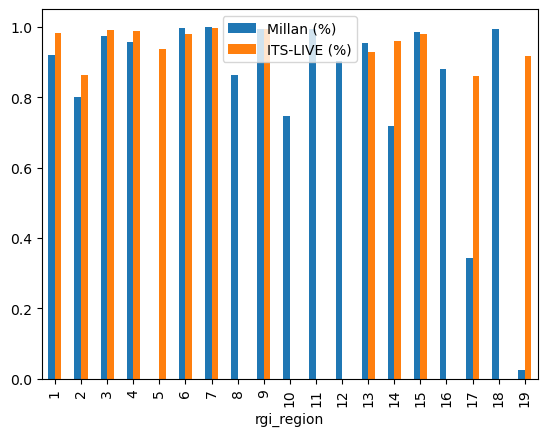

In [16]:
perc_valid_millan.plot(kind='bar');

In [18]:
dfg.loc[dfg.n_points > 0]

Empty DataFrame
Columns: [rgi_region, rgi_subregion, rgi_area_km2, n_points, n_valid_thick_points, n_valid_elev_points, n_valid_gridded_points, avg_thick, max_thick, date_mode, date_min, date_max]
Index: []

In [24]:
df.dem_source.unique()

array(['COPDEM30', 'COPDEM90', 'NASADEM'], dtype=object)

In [26]:
df.loc[df.dem_med_elev.isnull()]

rgi_region rgi_subregion  name     cenlon     cenlat  \
rgi_id                                                                          
RGI2000-v7.0-C-04-00527           4         04-03   NaN -84.041589  73.294664   
RGI2000-v7.0-C-04-00864           4         04-03   NaN -84.458567  73.000620   
RGI2000-v7.0-C-12-01378          12         12-01   NaN  46.703337  41.960324   
RGI2000-v7.0-C-12-01379          12         12-01   NaN  46.695517  41.957207   
RGI2000-v7.0-C-12-01380          12         12-01   NaN  46.658509  41.954966   
...                             ...           ...   ...        ...        ...   
RGI2000-v7.0-C-19-01372          19         19-20   NaN -61.493143 -64.515108   
RGI2000-v7.0-C-19-01418          19         19-20   NaN -66.718770 -68.195338   
RGI2000-v7.0-C-19-01419          19         19-20   NaN -66.720660 -68.204525   
RGI2000-v7.0-C-19-01571          19         19-21   NaN -54.720919 -63.436136   
RGI2000-v7.0-C-19-01572          19         19-21   NaN -56.589897 -64.229125   

                         rgi_area_km2  rgi_year     glacier_type  \
rgi_id                                                             
RGI2000-v7.0-C-04-00527      0.010356      2000  Glacier complex   
RGI2000-v7.0-C-04-00864      0.011030      2000  Glacier complex   
RGI2000-v7.0-C-12-01378      0.341187      2000  Glacier complex   
RGI2000-v7.0-C-12-01379      0.100726      2000  Glacier complex   
RGI2000-v7.0-C-12-01380      0.190444      2000  Glacier complex   
...                               ...       ...              ...   
RGI2000-v7.0-C-19-01372      0.023061      2000  Glacier complex   
RGI2000-v7.0-C-19-01418      0.034402      2000  Glacier complex   
RGI2000-v7.0-C-19-01419      0.054456      2000  Glacier complex   
RGI2000-v7.0-C-19-01571      0.785394      2000  Glacier complex   
RGI2000-v7.0-C-19-01572      0.047745      2000  Glacier complex   

                        terminus_type  is_tidewater  ... flowline_min_elev  \
rgi_id                                               ...                     
RGI2000-v7.0-C-04-00527  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-04-00864  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-12-01378  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-12-01379  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-12-01380  Not assigned         False  ...               NaN   
...                               ...           ...  ...               ...   
RGI2000-v7.0-C-19-01372  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-19-01418  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-19-01419  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-19-01571  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-19-01572  Not assigned         False  ...               NaN   

                         flowline_avg_slope  flowline_avg_width  \
rgi_id                                                            
RGI2000-v7.0-C-04-00527                 NaN                 NaN   
RGI2000-v7.0-C-04-00864                 NaN                 NaN   
RGI2000-v7.0-C-12-01378                 NaN                 NaN   
RGI2000-v7.0-C-12-01379                 NaN                 NaN   
RGI2000-v7.0-C-12-01380                 NaN                 NaN   
...                                     ...                 ...   
RGI2000-v7.0-C-19-01372                 NaN                 NaN   
RGI2000-v7.0-C-19-01418                 NaN                 NaN   
RGI2000-v7.0-C-19-01419                 NaN                 NaN   
RGI2000-v7.0-C-19-01571                 NaN                 NaN   
RGI2000-v7.0-C-19-01572                 NaN                 NaN   

                         flowline_last_width flowline_last_5_widths  \
rgi_id                                                                
RGI2000-v7.0-C-04-00527                  NaN             

In [29]:
import matplotlib.pyplot as plt

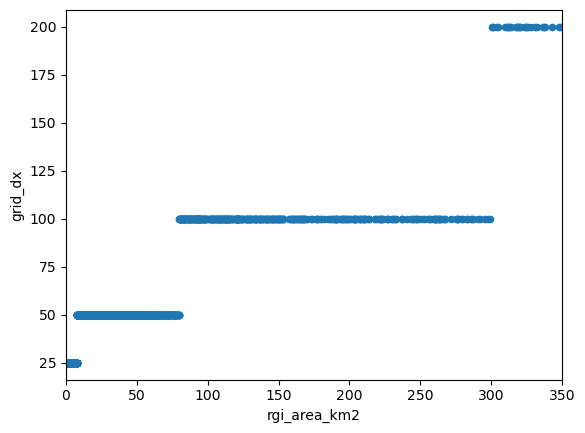

In [34]:
df.plot(kind='scatter', x='rgi_area_km2', y='grid_dx');
plt.xlim(0, 350);

In [35]:
shp = df.copy()

In [39]:
shp['grid_nn'] = shp['grid_ny'] * shp['grid_ny']

cat0 = shp.loc[shp.grid_dx == 25].sort_values(by='grid_nn', ascending=False)
cat1 = shp.loc[shp.grid_dx == 50].sort_values(by='grid_nn', ascending=False)
cat2 = shp.loc[shp.grid_dx == 100].sort_values(by='grid_nn', ascending=False)
cat3 = shp.loc[shp.grid_dx == 200].sort_values(by='grid_nn', ascending=False)

sdf = pd.DataFrame()
c = 'N glaciers'
sdf.loc['dx  25', c] = f'{len(cat0):d}'
sdf.loc['dx  50', c] = f'{len(cat1):d}'
sdf.loc['dx 100', c] = f'{len(cat2):d}'
sdf.loc['dx 200', c] = f'{len(cat3):d}'
c = 'Total area (x1e6)'
sdf.loc['dx  25', c] = f'{int(cat0.rgi_area_km2.sum()):d}'
sdf.loc['dx  50', c] = f'{int(cat1.rgi_area_km2.sum()):d}'
sdf.loc['dx 100', c] = f'{int(cat2.rgi_area_km2.sum()):d}'
sdf.loc['dx 200', c] = f'{int(cat3.rgi_area_km2.sum()):d}'
c = 'max grid points'
sdf.loc['dx  25', c] = f'{int(cat0.iloc[0].grid_nx):d}x{int(cat0.iloc[0].grid_ny):d}'
sdf.loc['dx  50', c] = f'{int(cat1.iloc[0].grid_nx):d}x{int(cat1.iloc[0].grid_ny):d}'
sdf.loc['dx 100', c] = f'{int(cat2.iloc[0].grid_nx):d}x{int(cat2.iloc[0].grid_ny):d}'
sdf.loc['dx 200', c] = f'{int(cat3.iloc[0].grid_nx):d}x{int(cat3.iloc[0].grid_ny):d}'
c = 'min grid points'
sdf.loc['dx  25', c] = f'{int(cat0.iloc[-1].grid_nx):d}x{int(cat0.iloc[-1].grid_ny):d}'
sdf.loc['dx  50', c] = f'{int(cat1.iloc[-1].grid_nx):d}x{int(cat1.iloc[-1].grid_ny):d}'
sdf.loc['dx 100', c] = f'{int(cat2.iloc[-1].grid_nx):d}x{int(cat2.iloc[-1].grid_ny):d}'
sdf.loc['dx 200', c] = f'{int(cat3.iloc[-1].grid_nx):d}x{int(cat3.iloc[-1].grid_ny):d}'
c = 'n glaciers < 10x10=100 grid points'
sdf.loc['dx  25', c] = f'{len(cat0.loc[cat0.grid_nn < 100]):d}'
sdf.loc['dx  50', c] = f'{len(cat1.loc[cat1.grid_nn < 100]):d}'
sdf.loc['dx 100', c] = f'{len(cat2.loc[cat2.grid_nn < 100]):d}'
sdf.loc['dx 200', c] = f'{len(cat3.loc[cat3.grid_nn < 100]):d}'
c = 'total number of grid points (x1e6)'
sdf.loc['dx  25', c] = f'{int(cat0.grid_nn.sum() * 1e-6):d}'
sdf.loc['dx  50', c] = f'{int(cat1.grid_nn.sum() * 1e-6):d}'
sdf.loc['dx 100', c] = f'{int(cat2.grid_nn.sum() * 1e-6):d}'
sdf.loc['dx 200', c] = f'{int(cat3.grid_nn.sum() * 1e-6):d}'

sdf.loc['Total', 'N glaciers'] = sdf['N glaciers'].astype(int).sum()
sdf.loc['Total', 'Total area (x1e6)'] = sdf.iloc[:4]['Total area (x1e6)'].astype(int).sum()
sdf.loc['Total', 'total number of grid points (x1e6)'] = sdf.iloc[:4]['total number of grid points (x1e6)'].astype(int).sum()
sdf.loc['Total', 'n glaciers < 10x10=100 grid points'] = sdf.iloc[:4]['n glaciers < 10x10=100 grid points'].astype(int).sum()
sdf.loc['Total', 'max grid points'] = ''
sdf.loc['Total', 'min grid points'] = ''
sdf

N glaciers Total area (x1e6) max grid points min grid points  \
dx  25     189517             74768         277x525           97x81   
dx  50       2733             60453         403x560         278x123   
dx 100        382             57527         470x547         310x166   
dx 200        237            513994       1358x2261         314x168   
Total      192869            706742                                   

       n glaciers < 10x10=100 grid points total number of grid points (x1e6)  
dx  25                                  0                               2312  
dx  50                                  0                                144  
dx 100                                  0                                 29  
dx 200                                  0                                 49  
Total                                   0                               2534

In [20]:
df.rgi_area_km2.idxmax()

'RGI2000-v7.0-C-19-00983'

In [14]:
df.loc[df['dem_med_elev'].isnull()].rgi_area_km2.sum()

58.6669228107555

In [15]:
df.loc[df['flowline_mean_elev'].isnull()].rgi_area_km2.sum()

5684.682839667472

In [16]:
d1 = 14.
d2 = 10.
dmax = 200.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df['dx'] = np.clip(d1 * np.sqrt(df.rgi_area_km2) + d2, 0, 200)

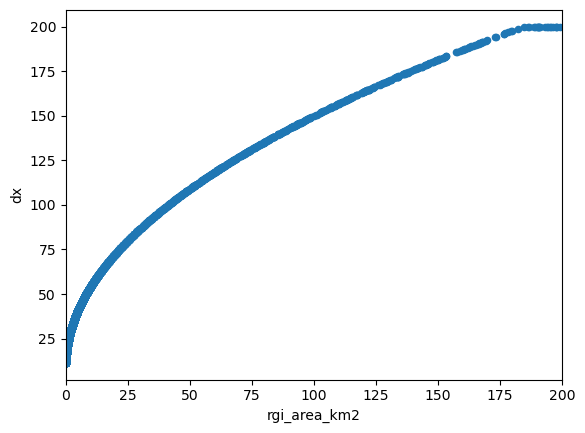

In [19]:
df.plot(x='rgi_area_km2', y='dx', kind='scatter');
plt.xlim(0, 200);

In [23]:
tdx = 100
((tdx - d2) / d1)**2

41.3265306122449

In [26]:
from oggm import utils
import geopandas as gpd
from salem import read_shapefile

In [28]:
shp = []
for reg in range(1, 20):
    shp.append(read_shapefile(utils.get_rgi_region_file(f'{reg:02d}', version='70C')))

In [29]:
shp = pd.concat(shp)

In [32]:
shp['x_dist'] = utils.haversine(shp.min_x, shp.min_y, shp.max_x, shp.min_y)
shp['y_dist'] = utils.haversine(shp.min_x, shp.min_y, shp.min_x, shp.max_y)

In [36]:
shp['x_dist'].min(), shp['y_dist'].max()

(56.365532575455305, 433639.7540472761)

In [216]:
bins = [0, 8, 80, 300, 1e9]
# bins = [0, 3, 12, 100, 1e9]
dxs = [25, 50, 100, 200]
shp['dx'] = np.NaN

for b1, b2, dx in zip(bins[:-1], bins[1:], dxs):
    shp.loc[(shp.area_km2 > b1) & (shp.area_km2 <= b2), 'dx'] = dx

shp['nx'] = np.ceil(shp['x_dist'] / shp['dx'])
shp['ny'] = np.ceil(shp['y_dist'] / shp['dx'])
shp['nn'] = shp['ny'] * shp['ny']

cat0 = shp.loc[shp.dx == 25].sort_values(by='nn', ascending=False)
cat1 = shp.loc[shp.dx == 50].sort_values(by='nn', ascending=False)
cat2 = shp.loc[shp.dx == 100].sort_values(by='nn', ascending=False)
cat3 = shp.loc[shp.dx == 200].sort_values(by='nn', ascending=False)

sdf = pd.DataFrame()
c = 'N glaciers'
sdf.loc['dx  25', c] = f'{len(cat0):d}'
sdf.loc['dx  50', c] = f'{len(cat1):d}'
sdf.loc['dx 100', c] = f'{len(cat2):d}'
sdf.loc['dx 200', c] = f'{len(cat3):d}'
c = 'Total area (x1e6)'
sdf.loc['dx  25', c] = f'{int(cat0.area_km2.sum()):d}'
sdf.loc['dx  50', c] = f'{int(cat1.area_km2.sum()):d}'
sdf.loc['dx 100', c] = f'{int(cat2.area_km2.sum()):d}'
sdf.loc['dx 200', c] = f'{int(cat3.area_km2.sum()):d}'
c = 'max grid points'
sdf.loc['dx  25', c] = f'{int(cat0.iloc[0].nx):d}x{int(cat0.iloc[0].ny):d}'
sdf.loc['dx  50', c] = f'{int(cat1.iloc[0].nx):d}x{int(cat1.iloc[0].ny):d}'
sdf.loc['dx 100', c] = f'{int(cat2.iloc[0].nx):d}x{int(cat2.iloc[0].ny):d}'
sdf.loc['dx 200', c] = f'{int(cat3.iloc[0].nx):d}x{int(cat3.iloc[0].ny):d}'
c = 'min grid points'
sdf.loc['dx  25', c] = f'{int(cat0.iloc[-1].nx):d}x{int(cat0.iloc[-1].ny):d}'
sdf.loc['dx  50', c] = f'{int(cat1.iloc[-1].nx):d}x{int(cat1.iloc[-1].ny):d}'
sdf.loc['dx 100', c] = f'{int(cat2.iloc[-1].nx):d}x{int(cat2.iloc[-1].ny):d}'
sdf.loc['dx 200', c] = f'{int(cat3.iloc[-1].nx):d}x{int(cat3.iloc[-1].ny):d}'
c = 'n glaciers < 10x10=100 grid points'
sdf.loc['dx  25', c] = f'{len(cat0.loc[cat0.nn < 100]):d}'
sdf.loc['dx  50', c] = f'{len(cat1.loc[cat1.nn < 100]):d}'
sdf.loc['dx 100', c] = f'{len(cat2.loc[cat2.nn < 100]):d}'
sdf.loc['dx 200', c] = f'{len(cat3.loc[cat3.nn < 100]):d}'
c = 'total number of grid points (x1e6)'
sdf.loc['dx  25', c] = f'{int(cat0.nn.sum() * 1e-6):d}'
sdf.loc['dx  50', c] = f'{int(cat1.nn.sum() * 1e-6):d}'
sdf.loc['dx 100', c] = f'{int(cat2.nn.sum() * 1e-6):d}'
sdf.loc['dx 200', c] = f'{int(cat3.nn.sum() * 1e-6):d}'

sdf.loc['Total', 'N glaciers'] = sdf['N glaciers'].astype(int).sum()
sdf.loc['Total', 'Total area (x1e6)'] = sdf.iloc[:4]['Total area (x1e6)'].astype(int).sum()
sdf.loc['Total', 'total number of grid points (x1e6)'] = sdf.iloc[:4]['total number of grid points (x1e6)'].astype(int).sum()
sdf.loc['Total', 'n glaciers < 10x10=100 grid points'] = sdf.iloc[:4]['n glaciers < 10x10=100 grid points'].astype(int).sum()
sdf.loc['Total', 'max grid points'] = ''
sdf.loc['Total', 'min grid points'] = ''
sdf

N glaciers Total area (x1e6) max grid points min grid points  \
dx  25     189517             74768         184x451            18x2   
dx  50       2733             60453         326x476          199x44   
dx 100        382             57527         396x464          230x86   
dx 200        237            513994       1211x2169          235x89   
Total      192869            706742                                   

       n glaciers < 10x10=100 grid points total number of grid points (x1e6)  
dx  25                              34204                                292  
dx  50                                  0                                 65  
dx 100                                  0                                 15  
dx 200                                  0                                 37  
Total                               34204                                409

In [215]:
bins = [0, 3, 12, 100, 1e9]
dxs = [25, 50, 100, 200]
shp['dx'] = np.NaN

for b1, b2, dx in zip(bins[:-1], bins[1:], dxs):
    shp.loc[(shp.area_km2 > b1) & (shp.area_km2 <= b2), 'dx'] = dx

shp['nx'] = np.ceil(shp['x_dist'] / shp['dx'])
shp['ny'] = np.ceil(shp['y_dist'] / shp['dx'])
shp['nn'] = shp['ny'] * shp['ny']

cat0 = shp.loc[shp.dx == 25].sort_values(by='nn', ascending=False)
cat1 = shp.loc[shp.dx == 50].sort_values(by='nn', ascending=False)
cat2 = shp.loc[shp.dx == 100].sort_values(by='nn', ascending=False)
cat3 = shp.loc[shp.dx == 200].sort_values(by='nn', ascending=False)

sdf = pd.DataFrame()
c = 'N glaciers'
sdf.loc['dx  25', c] = f'{len(cat0):d}'
sdf.loc['dx  50', c] = f'{len(cat1):d}'
sdf.loc['dx 100', c] = f'{len(cat2):d}'
sdf.loc['dx 200', c] = f'{len(cat3):d}'
c = 'Total area (x1e6)'
sdf.loc['dx  25', c] = f'{int(cat0.area_km2.sum()):d}'
sdf.loc['dx  50', c] = f'{int(cat1.area_km2.sum()):d}'
sdf.loc['dx 100', c] = f'{int(cat2.area_km2.sum()):d}'
sdf.loc['dx 200', c] = f'{int(cat3.area_km2.sum()):d}'
c = 'max grid points'
sdf.loc['dx  25', c] = f'{int(cat0.iloc[0].nx):d}x{int(cat0.iloc[0].ny):d}'
sdf.loc['dx  50', c] = f'{int(cat1.iloc[0].nx):d}x{int(cat1.iloc[0].ny):d}'
sdf.loc['dx 100', c] = f'{int(cat2.iloc[0].nx):d}x{int(cat2.iloc[0].ny):d}'
sdf.loc['dx 200', c] = f'{int(cat3.iloc[0].nx):d}x{int(cat3.iloc[0].ny):d}'
c = 'min grid points'
sdf.loc['dx  25', c] = f'{int(cat0.iloc[-1].nx):d}x{int(cat0.iloc[-1].ny):d}'
sdf.loc['dx  50', c] = f'{int(cat1.iloc[-1].nx):d}x{int(cat1.iloc[-1].ny):d}'
sdf.loc['dx 100', c] = f'{int(cat2.iloc[-1].nx):d}x{int(cat2.iloc[-1].ny):d}'
sdf.loc['dx 200', c] = f'{int(cat3.iloc[-1].nx):d}x{int(cat3.iloc[-1].ny):d}'
c = 'n glaciers < 10x10=100 grid points'
sdf.loc['dx  25', c] = f'{len(cat0.loc[cat0.nn < 100]):d}'
sdf.loc['dx  50', c] = f'{len(cat1.loc[cat1.nn < 100]):d}'
sdf.loc['dx 100', c] = f'{len(cat2.loc[cat2.nn < 100]):d}'
sdf.loc['dx 200', c] = f'{len(cat3.loc[cat3.nn < 100]):d}'
c = 'total number of grid points (x1e6)'
sdf.loc['dx  25', c] = f'{int(cat0.nn.sum() * 1e-6):d}'
sdf.loc['dx  50', c] = f'{int(cat1.nn.sum() * 1e-6):d}'
sdf.loc['dx 100', c] = f'{int(cat2.nn.sum() * 1e-6):d}'
sdf.loc['dx 200', c] = f'{int(cat3.nn.sum() * 1e-6):d}'

sdf.loc['Total', 'N glaciers'] = sdf['N glaciers'].astype(int).sum()
sdf.loc['Total', 'Total area (x1e6)'] = sdf.iloc[:4]['Total area (x1e6)'].astype(int).sum()
sdf.loc['Total', 'total number of grid points (x1e6)'] = sdf.iloc[:4]['total number of grid points (x1e6)'].astype(int).sum()
sdf.loc['Total', 'n glaciers < 10x10=100 grid points'] = sdf.iloc[:4]['n glaciers < 10x10=100 grid points'].astype(int).sum()
sdf.loc['Total', 'max grid points'] = ''
sdf.loc['Total', 'min grid points'] = ''
sdf

N glaciers Total area (x1e6) max grid points min grid points  \
dx  25     184936             53221         122x227            18x2   
dx  50       5505             30566          92x226           94x26   
dx 100       1898             59372         128x241          103x26   
dx 200        530            563583       1211x2169          115x43   
Total      192869            706742                                   

       n glaciers < 10x10=100 grid points total number of grid points (x1e6)  
dx  25                              34204                                201  
dx  50                                  0                                 32  
dx 100                                  0                                 16  
dx 200                                  0                                 40  
Total                               34204                                289

N glaciers max grid points n glaciers < 10x10=100 grid points  \
dx  25    189517.0         184x451                              34204   
dx  50      2733.0         326x476                                  0   
dx 100       382.0         396x464                                  0   
dx 200       237.0       1211x2169                                  0   

       total number of grid points (x1e6)  
dx  25                                292  
dx  50                                 65  
dx 100                                 15  
dx 200                                 37

203401.0

In [178]:
cat0.iloc[:5][['area_km2', 'dx', 'nx', 'ny', 'nn']]

area_km2    dx     nx     ny        nn
11572  7.086165  25.0  184.0  451.0  203401.0
8253   6.380712  25.0  155.0  439.0  192721.0
13950  7.331065  25.0  172.0  372.0  138384.0
19743  7.306236  25.0  231.0  371.0  137641.0
10083  7.715254  25.0  252.0  349.0  121801.0

In [167]:
cat1.iloc[:5][['area_km2', 'dx', 'nx', 'ny', 'nn']]

area_km2    dx     nx     ny        nn
13795  56.992818  50.0  326.0  476.0  226576.0
1598   63.242117  50.0  255.0  415.0  172225.0
3475   62.899832  50.0  194.0  415.0  172225.0
3491   65.128722  50.0  253.0  402.0  161604.0
1357   68.397018  50.0  441.0  398.0  158404.0

In [168]:
cat1.iloc[-5:][['area_km2', 'dx', 'nx', 'ny', 'nn']]

area_km2    dx     nx    ny      nn
29     12.384520  50.0  206.0  51.0  2601.0
4690    9.928964  50.0  234.0  51.0  2601.0
15304   8.196546  50.0  180.0  50.0  2500.0
38128   9.361947  50.0  130.0  50.0  2500.0
4365   11.374786  50.0  199.0  44.0  1936.0

In [169]:
cat2.iloc[:5][['area_km2', 'dx', 'nx', 'ny', 'nn']]

area_km2     dx     nx     ny        nn
11004  207.048098  100.0  183.0  363.0  131769.0
2677   202.384008  100.0  209.0  343.0  117649.0
721    221.892780  100.0  171.0  342.0  116964.0
20445  182.155330  100.0  243.0  336.0  112896.0
2023   194.180871  100.0  125.0  334.0  111556.0

In [170]:
cat2.iloc[-5:][['area_km2', 'dx', 'nx', 'ny', 'nn']]

area_km2     dx     nx    ny      nn
752    120.747583  100.0  164.0  99.0  9801.0
1138   114.683394  100.0  212.0  98.0  9604.0
728     89.538408  100.0  180.0  97.0  9409.0
39970   87.563661  100.0  213.0  91.0  8281.0
1068   110.002290  100.0  230.0  86.0  7396.0

In [171]:
cat3.iloc[:5][['area_km2', 'dx', 'nx', 'ny', 'nn']]

area_km2     dx      nx      ny         nn
982   47487.324829  200.0  1211.0  2169.0  4704561.0
7835  12509.582623  200.0   401.0  1820.0  3312400.0
252   20395.824163  200.0  1787.0  1418.0  2010724.0
9428  30196.075148  200.0  1904.0  1358.0  1844164.0
1935  19009.997810  200.0   900.0  1033.0  1067089.0

In [172]:
cat3.iloc[-5:][['area_km2', 'dx', 'nx', 'ny', 'nn']]

area_km2     dx     nx    ny      nn
20     266.851512  200.0  168.0  89.0  7921.0
37     264.442881  200.0  118.0  86.0  7396.0
4721   251.749584  200.0  178.0  85.0  7225.0
15515  255.888821  200.0  275.0  83.0  6889.0
52     260.383065  200.0  128.0  76.0  5776.0

In [56]:
4704561 / (1000*1000)

4.704561

In [57]:
shp.sort_values(by='nn', ascending=False)

rgi_id o1region o2region      cenlon     cenlat  \
982    RGI2000-v7.0-C-19-00983       19    19-19  -70.655673 -70.730764   
7835   RGI2000-v7.0-C-17-07836       17    17-01  -73.644550 -49.951092   
252    RGI2000-v7.0-C-09-00253       09    09-02   60.419872  75.624416   
9428   RGI2000-v7.0-C-01-09429       01    01-05 -140.295732  60.449492   
1935   RGI2000-v7.0-C-03-01936       03    03-04  -80.245737  78.212152   
...                        ...      ...      ...         ...        ...   
20760  RGI2000-v7.0-C-17-20761       17    17-02  -70.242394 -30.491812   
5444   RGI2000-v7.0-C-17-05445       17    17-01  -72.301124 -46.921214   
1444   RGI2000-v7.0-C-17-01445       17    17-01  -72.437274 -48.532582   
15177  RGI2000-v7.0-C-17-15178       17    17-02  -72.167933 -41.881952   
22287  RGI2000-v7.0-C-17-22288       17    17-02  -68.854075 -27.382664   

       utm_zone      area_km2  \
982          19  47487.324829   
7835         18  12509.582623   
252          41  20395.824163   
9428          7  30196.075148   
1935         17  19009.997810   
...         ...           ...   
20760        19      0.014234   
5444         18      0.011701   
1444         18      0.012270   
15177        18      0.010201   
22287        19      0.012253   

                                                geometry       min_x  \
982    POLYGON Z ((-70.42151 -72.13121 0.00000, -70.4...  -75.442594   
7835   POLYGON Z ((-73.89182 -50.31728 0.00000, -73.8...  -74.135264   
252    POLYGON Z ((56.56064 74.50850 0.00000, 56.5564...   56.109726   
9428   POLYGON Z ((-144.45994 60.49749 0.00000, -144.... -144.601354   
1935   POLYGON Z ((-81.56188 78.07304 0.00000, -81.56...  -82.099626   
...                                                  ...         ...   
20760  POLYGON Z ((-70.24111 -30.49211 0.00000, -70.2...  -70.243608   
5444   POLYGON Z ((-72.30014 -46.92119 0.00000, -72.3...  -72.302895   
1444   POLYGON Z ((-72.43568 -48.53235 0.00000, -72.4...  -72.438900   
15177  POLYGON Z ((-72.16879 -41.88231 0.00000, -72.1...  -72.169146   
22287  POLYGON Z ((-68.85606 -27.38261 0.00000, -68.8...  -68.856342   

            max_x      min_y      max_y         x_dist         y_dist     dx  \
982    -68.123990 -72.680688 -68.780872  242112.961979  433639.754047  200.0   
7835   -72.977291 -51.587716 -48.314479   80000.233846  363967.348105  200.0   
252     68.038268  74.349290  76.899455  357224.923202  283565.410107  200.0   
9428  -137.904982  59.228614  61.670370  380788.882928  271510.879304  200.0   
1935   -74.745156  77.283267  79.141019  179901.170816  206572.597364  200.0   
...           ...        ...        ...            ...            ...    ...   
20760  -70.241018 -30.492124 -30.491537     248.164860      65.271422   25.0   
5444   -72.299747 -46.921525 -46.920911     239.078228      68.273685   25.0   
1444   -72.435593 -48.532843 -48.532314     243.501811      58.822116   25.0   
15177  -72.166744 -41.882308 -41.881655     198.853399      72.610287   25.0   
22287  -68.851853 -27.382852 -27.382489     443.225354      40.363758   25.0   

           nx      ny         nn  cat  
982    1211.0  2169.0  4704561.0    0  
7835    401.0  1820.0  3312400.0    0  
252    1787.0  1418.0  2010724.0    0  
9428   1904.0  1358.0  1844164.0    0  
1935    900.0  1033.0  1067089.0    0  
...       ...     ...        ...  ...  
20760    10.0     3.0        9.0    0  
5444     10.0     3.0        9.0    0  
1444     10.0     3.0        9.0    0  
15177     8.0     3.0        9.0    0  
22287    18.0     2.0        4.0    0  

[192869 rows x 19 columns]

In [20]:
1933 * 1425 

2754525

In [21]:
2754525

2754525